In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [11]:
df_white = pd.read_csv('winequality-white.csv', sep=";")
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## Predicting Wine Quality

Linear Regression

In [12]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load your dataset (Assuming the dataset is a CSV file)
# df = pd.read_csv('your_wine_dataset.csv')

# Split features and target variable
X = df_white.drop('quality', axis=1)  # Replace 'quality' with the actual column name for wine quality
y = df_white['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 0.5690247717229232
Mean Absolute Error (MAE): 0.5862665383250459
R-squared (R²): 0.2652750042179184


Random Forest Approach

In [13]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split dataset into features and target variable
X = df_white.drop('quality', axis=1)
y = df_white['quality']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 0.34775581632653063
Mean Absolute Error (MAE): 0.4185204081632653
R-squared (R²): 0.5509775612930288


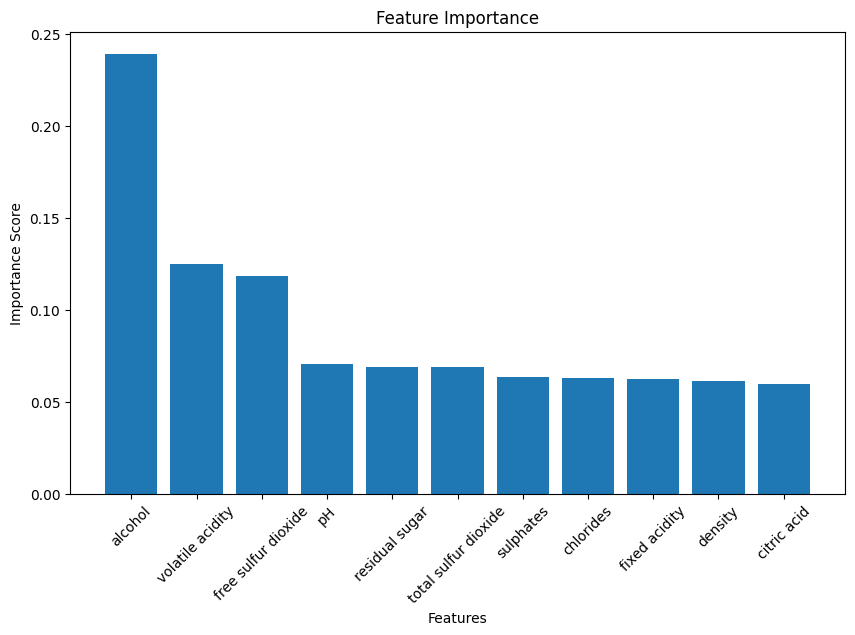

In [14]:
# For Random Forest or Gradient Boosting
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importance
importance = rf_model.feature_importances_  # or gb_model.feature_importances_
features = X_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()


XGboost

In [15]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 0.4605508659851769
Mean Absolute Error (MAE): 0.5348251162743082
R-squared (R²): 0.40533649921417236


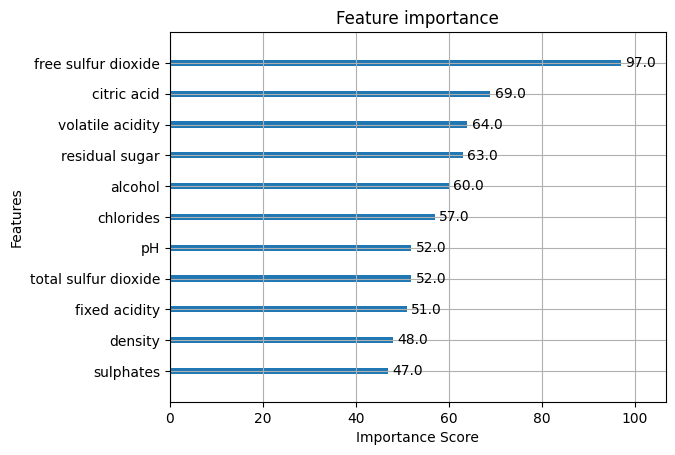

In [16]:
from xgboost import plot_importance

# Plot feature importance
plot_importance(xgb_model, importance_type='weight', xlabel='Importance Score')
plt.show()


## Feature Impact on Quality

c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


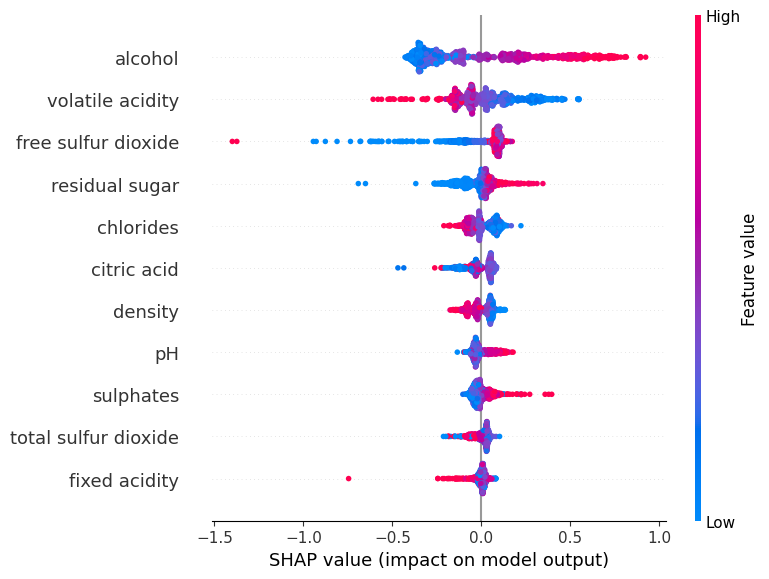

In [17]:
import shap

# Create SHAP explainer
explainer = shap.TreeExplainer(xgb_model, X_train)  # Use your trained model and data
shap_values = explainer(X_test)

# Convert shap_values to a NumPy array for compatibility
shap_values_array = shap_values.values

# SHAP summary plot: Shows the direction and magnitude of impact
shap.summary_plot(shap_values, X_test)

C:\Users\chris\AppData\Local\Temp\ipykernel_41476\550539674.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=melted_df, x="Feature", y="SHAP Value", palette="Set2", showfliers=False)


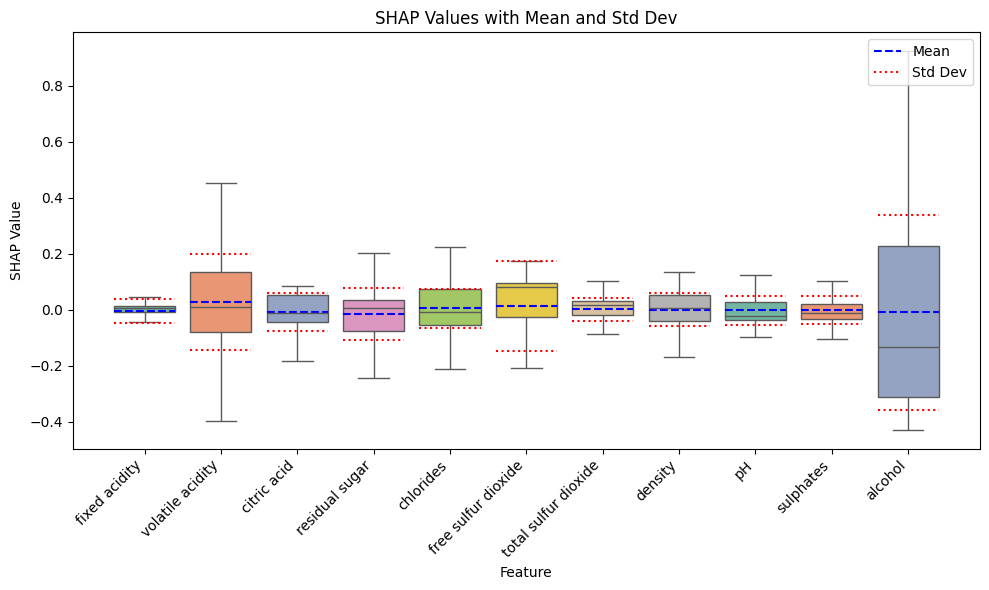

In [21]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate SHAP values
explainer = shap.TreeExplainer(xgb_model, X_train)  # Use your trained model and data
shap_values = explainer(X_test)

# Extract SHAP values as NumPy array
shap_values_array = shap_values.values
feature_names = X_test.columns  # Ensure feature names are accessible
shap_values_df = pd.DataFrame(shap_values_array, columns=feature_names)

# Calculate mean and standard deviation for each feature
mean_shap_values = shap_values_df.mean()
std_shap_values = shap_values_df.std()

# Prepare data for plotting
melted_df = shap_values_df.melt(var_name="Feature", value_name="SHAP Value")

# Plot with Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted_df, x="Feature", y="SHAP Value", palette="Set2", showfliers=False)
plt.xticks(rotation=45, ha='right')

# Overlay mean and standard deviation lines
for i, feature in enumerate(feature_names):
    plt.hlines(mean_shap_values[feature], i - 0.4, i + 0.4, colors='blue', linestyles='--', label='Mean' if i == 0 else "")
    plt.hlines([mean_shap_values[feature] - std_shap_values[feature], mean_shap_values[feature] + std_shap_values[feature]], 
               i - 0.4, i + 0.4, colors='red', linestyles=':', label='Std Dev' if i == 0 else "")

# Add legend
plt.legend(loc='upper right')
plt.title('SHAP Values with Mean and Std Dev')
plt.tight_layout()
plt.show()


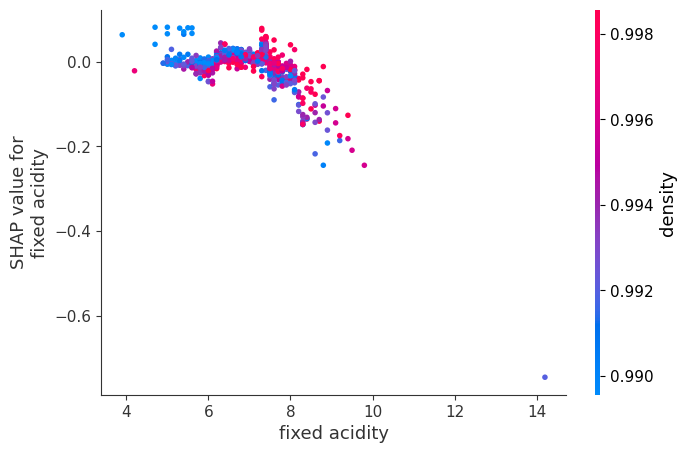

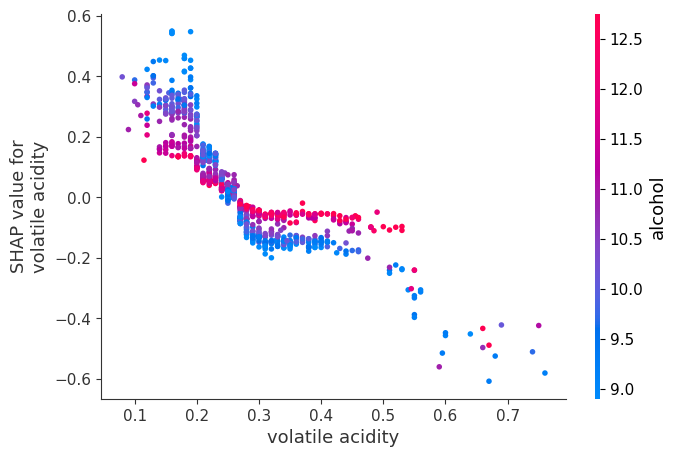

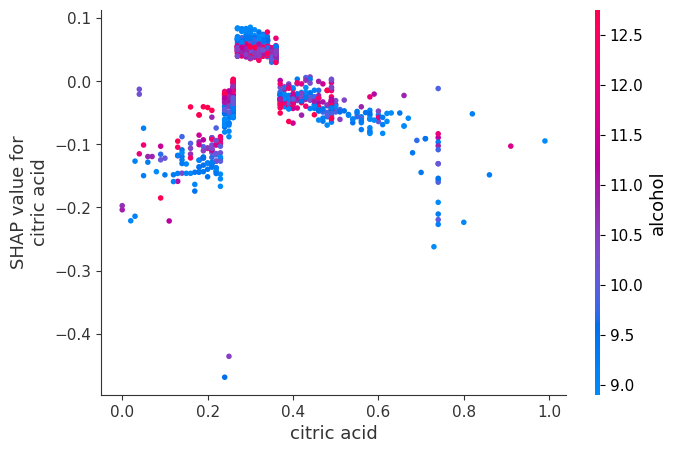

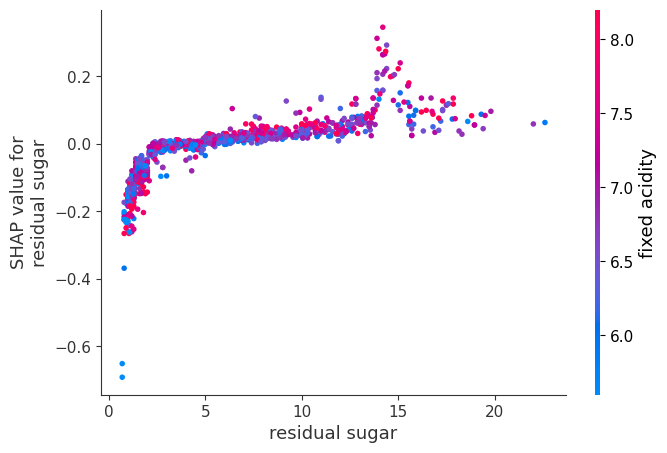

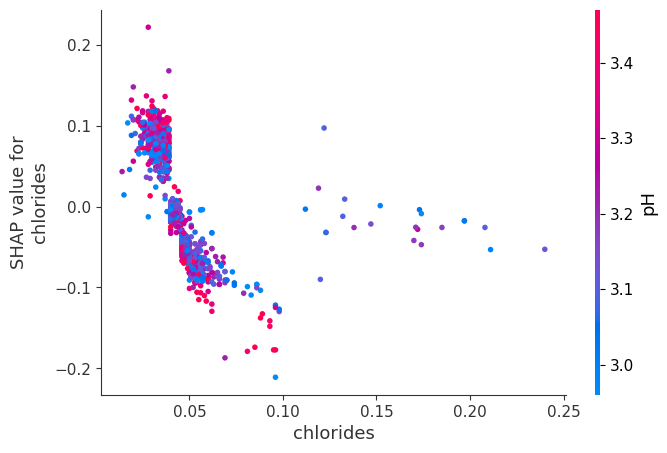

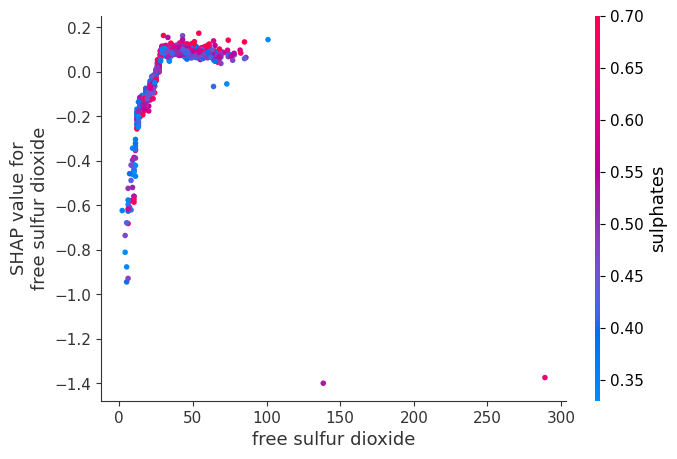

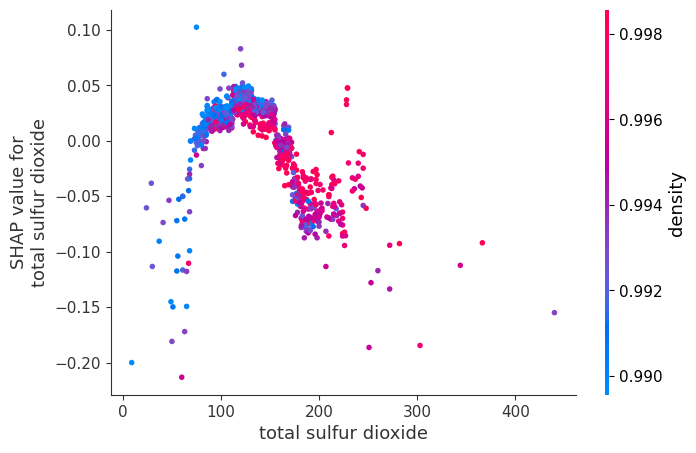

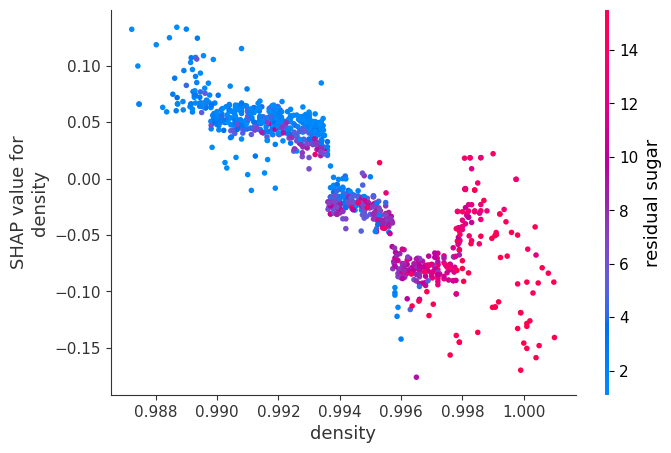

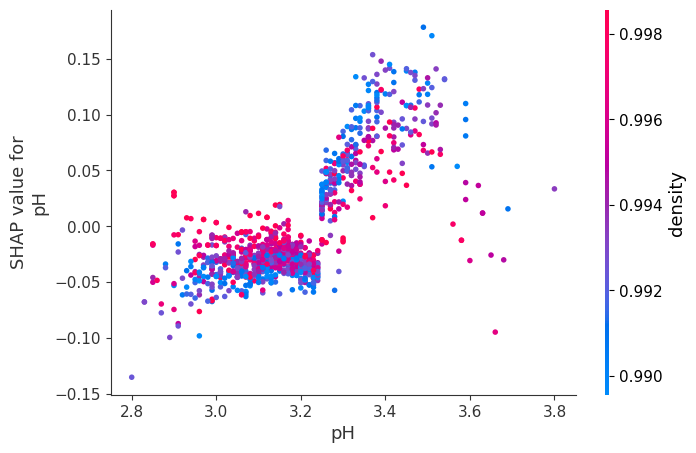

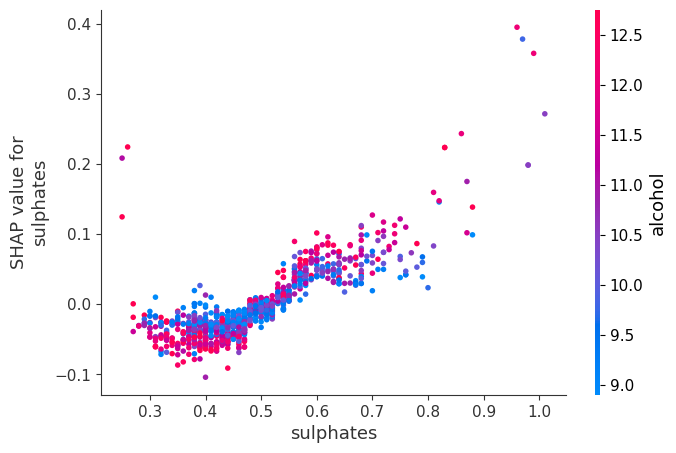

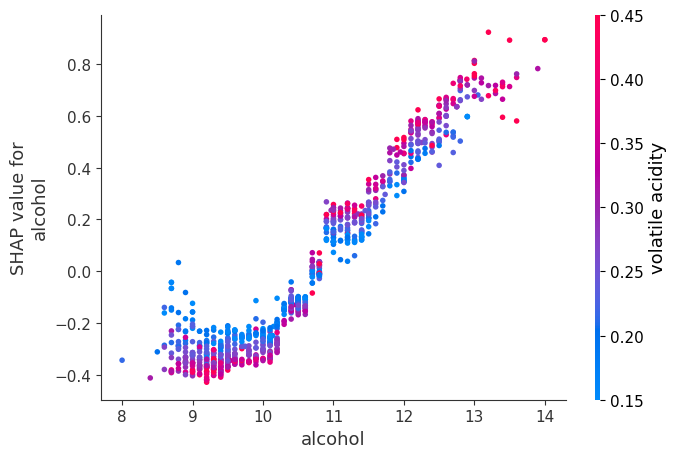

In [18]:
# Plot SHAP dependence plots for each feature
for feature in X_train.columns:
    shap.dependence_plot(feature, shap_values_array, X_test)

Partial Dependence Plots

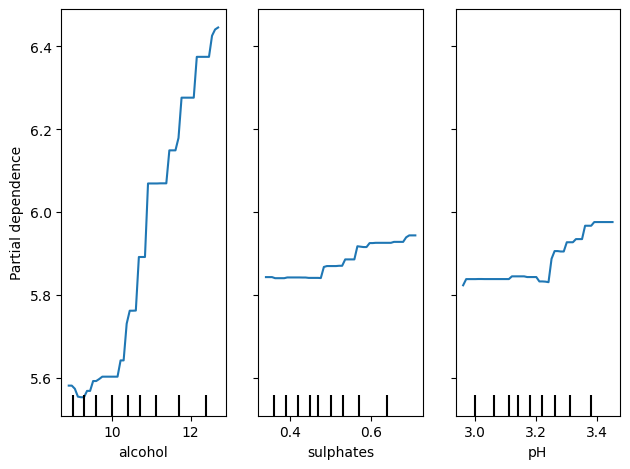

In [19]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Plot partial dependence for single or multiple features
PartialDependenceDisplay.from_estimator(xgb_model, X_train, ['alcohol', 'sulphates', 'pH'], grid_resolution=50)

# Customize plot
plt.tight_layout()
plt.show()


Correlations

In [20]:
correlations = df_white.corr()['quality'].sort_values(ascending=False)
print(correlations)


quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64
